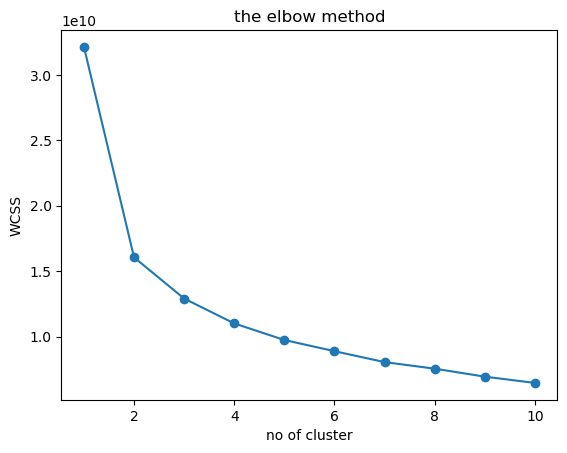

In [275]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.read_csv("scaled_dataset.csv")
df.drop("CUST_ID",axis=1,inplace=True)

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title('the elbow method')
plt.xlabel('no of cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(df)
df['K_Cluster'] = y_kmeans
df 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,h_Cluster,DBSCAN_Cluster
0,16.834929,0.75,15.00,15.00,0.00000,209.025389,0.090909,0.090909,0.000000,0.090909,1.0,1.0,7500.0,430.213001,86.959785,0.000000,12.0,0,0,0
1,540.020858,1.00,612.23,495.61,116.62000,1708.923217,0.666667,0.166667,0.500000,0.333333,10.0,10.0,2000.0,1642.068707,419.956251,0.000000,12.0,1,1,0
2,119.237712,1.00,342.74,0.00,342.74000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,20.0,2000.0,327.166041,165.207233,0.000000,12.0,1,1,0
3,894.081947,1.00,1901.71,1518.60,48.60000,206.618780,0.666667,0.666667,0.416667,0.083333,1.0,33.0,1500.0,947.130141,220.745296,0.000000,12.0,1,1,0
4,1294.145453,1.00,2852.81,1518.60,1198.14375,0.000000,1.000000,0.416667,1.000000,0.000000,0.0,42.0,7000.0,4145.830201,497.637767,0.083333,12.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,482.028341,1.00,106.47,0.00,106.47000,0.000000,0.500000,0.000000,0.500000,0.000000,0.0,9.0,2500.0,184.166639,179.412181,0.000000,12.0,1,1,0
1996,4710.195354,1.00,0.00,0.00,0.00000,2034.051299,0.000000,0.000000,0.000000,0.166667,3.0,0.0,12000.0,2428.847512,1842.138636,0.000000,12.0,0,0,0
1997,393.700868,1.00,0.00,0.00,0.00000,673.644618,0.000000,0.000000,0.000000,0.166667,3.0,0.0,1000.0,319.088414,185.010395,0.000000,12.0,1,1,0
1998,1508.132993,0.75,0.00,0.00,0.00000,2418.319143,0.000000,0.000000,0.000000,0.375000,10.0,0.0,2500.0,379.847536,444.160316,0.000000,12.0,1,1,0


In [ ]:
df['K_Cluster'].value_counts()

Cluster
1    1387
0     613
Name: count, dtype: int64

Shape after PCA: (2000, 2)


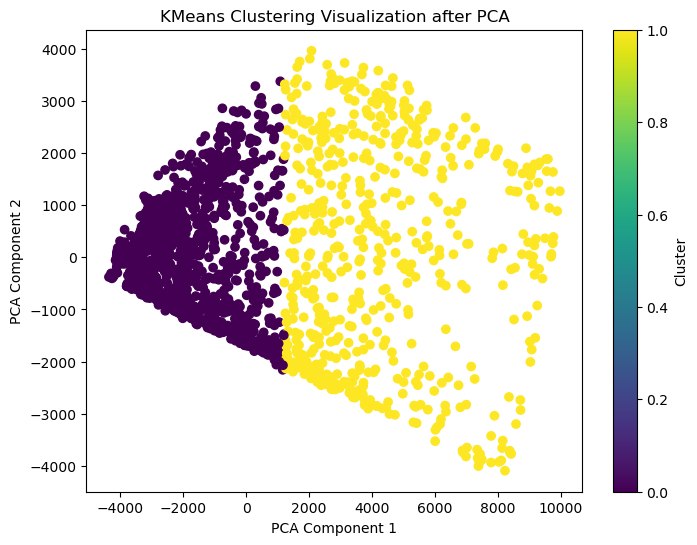

In [277]:
pca = PCA(n_components=2)
df_2d = pca.fit_transform(df.drop(columns=['Cluster']))

print("Shape after PCA:", df_2d.shape)
plt.figure(figsize=(8,6))

plt.scatter(df_2d[:, 0], df_2d[:, 1], c=y_kmeans, marker='o')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering Visualization after PCA')
plt.colorbar(label='Cluster')
plt.show()


In [278]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df.drop('Cluster', axis=1), y_kmeans)
print(f"Silhouette Score for 2 clusters: {score}")

Silhouette Score for 2 clusters: 0.47218986955766173


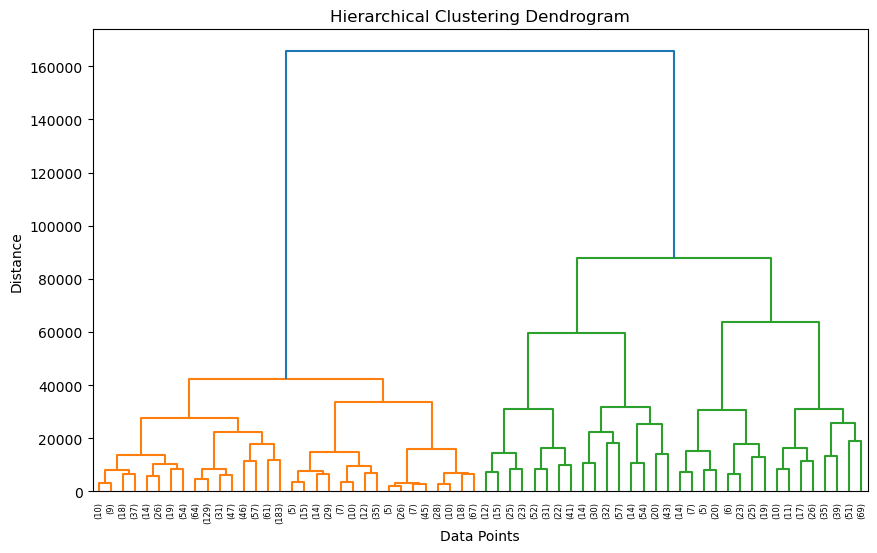

In [ ]:
import scipy.cluster.hierarchy as sch
linked = sch.linkage(df, method='ward')
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(linked,truncate_mode='level',p=5)
plt.title('Hierarchica Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2,linkage='ward')
y_hc = hc.fit_predict(df)
df['H_Cluster'] = y_hc
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,h_Cluster
0,16.834929,0.75,15.00,15.00,0.00000,209.025389,0.090909,0.090909,0.000000,0.090909,1.0,1.0,7500.0,430.213001,86.959785,0.000000,12.0,1,0
1,540.020858,1.00,612.23,495.61,116.62000,1708.923217,0.666667,0.166667,0.500000,0.333333,10.0,10.0,2000.0,1642.068707,419.956251,0.000000,12.0,0,1
2,119.237712,1.00,342.74,0.00,342.74000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,20.0,2000.0,327.166041,165.207233,0.000000,12.0,0,1
3,894.081947,1.00,1901.71,1518.60,48.60000,206.618780,0.666667,0.666667,0.416667,0.083333,1.0,33.0,1500.0,947.130141,220.745296,0.000000,12.0,0,1
4,1294.145453,1.00,2852.81,1518.60,1198.14375,0.000000,1.000000,0.416667,1.000000,0.000000,0.0,42.0,7000.0,4145.830201,497.637767,0.083333,12.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,482.028341,1.00,106.47,0.00,106.47000,0.000000,0.500000,0.000000,0.500000,0.000000,0.0,9.0,2500.0,184.166639,179.412181,0.000000,12.0,0,1
1996,4710.195354,1.00,0.00,0.00,0.00000,2034.051299,0.000000,0.000000,0.000000,0.166667,3.0,0.0,12000.0,2428.847512,1842.138636,0.000000,12.0,1,0
1997,393.700868,1.00,0.00,0.00,0.00000,673.644618,0.000000,0.000000,0.000000,0.166667,3.0,0.0,1000.0,319.088414,185.010395,0.000000,12.0,0,1
1998,1508.132993,0.75,0.00,0.00,0.00000,2418.319143,0.000000,0.000000,0.000000,0.375000,10.0,0.0,2500.0,379.847536,444.160316,0.000000,12.0,0,1


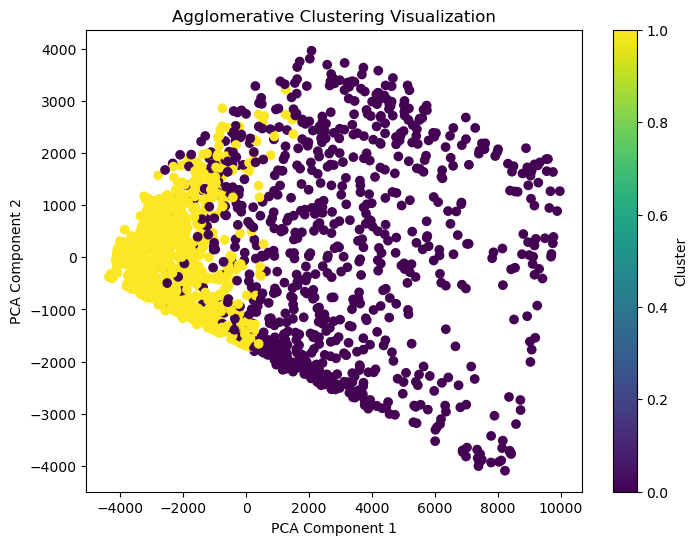

In [281]:
pca = PCA(n_components=2)
df_2d = pca.fit_transform(df.drop(columns=['h_Cluster']))

plt.figure(figsize=(8,6))
plt.scatter(df_2d[:,0], df_2d[:,1], c=y_hc, marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()

In [282]:
score = silhouette_score(df, y_hc)
print(f"Silhouette Score for 2 clusters: {score:.3f}")

Silhouette Score for 2 clusters: 0.395


In [286]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

scaled_df = StandardScaler().fit_transform(df)

db = DBSCAN(eps=2.3, min_samples=5).fit(scaled_df)
labels = db.labels_
df['DBSCAN_Cluster'] = labels

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
if n_clusters > 1:
    score = silhouette_score(scaled_df, labels)
    print(f"Number of Clusters: {n_clusters}")
    print(f"Silhouette Score: {score:.3f}")
else:
    print(f"Number of Clusters: {n_clusters}")
    print("Silhouette Score cannot be computed (only one cluster).")

Number of Clusters: 3
Silhouette Score: 0.241


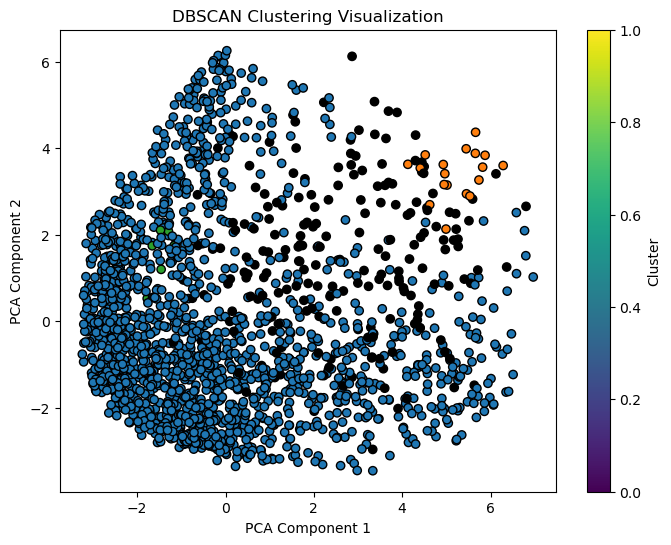

In [294]:
pca = PCA(n_components=2)
df_2d = pca.fit_transform(scaled_df)

colors = ['black' if label == -1 else f'C{label}' for label in labels]

plt.figure(figsize=(8,6))
plt.scatter(df_2d[:,0], df_2d[:,1], c=colors, edgecolor='k')
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Visualization')
plt.show()

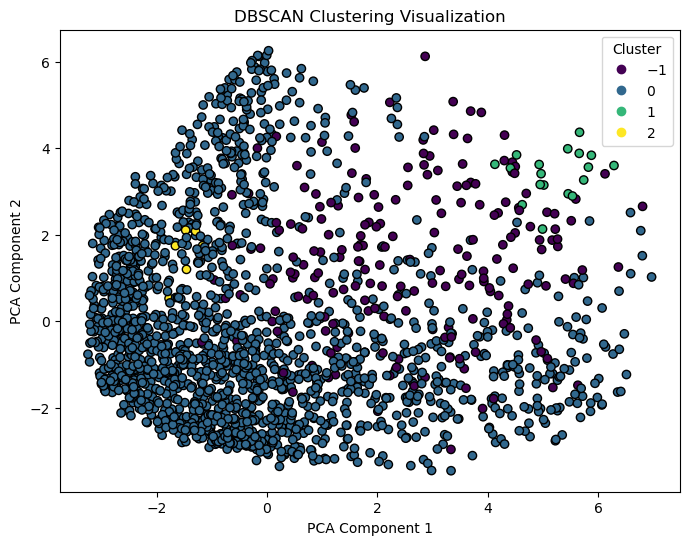

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_2d = pca.fit_transform(scaled_df)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_2d[:, 0], df_2d[:, 1], c=labels, cmap='viridis', edgecolor='k')
legend1 = plt.legend(*scatter.legend_elements(),title="Cluster",loc="upper right")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Visualization')
plt.show()


| Algorithm    | Number of Clusters | Silhouette Score | Notes                                   |
| ------------ | ------------------ | ---------------- | --------------------------------------  |
| KMeans       | 2                  | 0.47             | Best score among the three              |
| Hierarchical | 2                  | 0.39             | Slightly lower than KMeans              |
| DBSCAN       | 4                  | 0.24             | Slightly lower than Kmeans and Hierarchical |